<a href="https://colab.research.google.com/github/BrianChegeGichau/Week13IP/blob/master/CustomerAdAnalysisModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the Question

**Customer Segmentation**


Am working as a Data Scientist consultant for a Kenyan Entrepreneur who needs to identify clients who can click her ads. The business involves teaching individuals on cryptography through an online platform. Her audiences are from various countries. She ran an ad on a related course and collected data in the process which we will be analyzing in this notebook.

# Objective of the Study

The main objectives of this study is:

*   Find and deal with outliers, anomalies, and missing data within the dataset.
*   Perform Univariate and Bivariate Analysis.
*   Get insights from the data.
*   Provide a comprehensive conclusion and recommendation.



# Metric for Success

The following are what will determine the success of my study:


*   To get insight from all the variables in our dataset.
*   Provide recommendations on their appropriateness of solving the given problem.



# The Experimental Design

The following are the steps that will be taken during the study:


*   Importing, installing and loading the needed R packages.
*   Reading and exploring the dataset.
*   Finding and dealing with outliers, anomalies and missing data within the dataset.
*   Feature engineering.
*   Perform Univariate and Bivariate Analysis.
*   Get to understand the measures of central tendency and spread in my data table.
*   Provide a recommendation and a conclusion drawn from the analysis done.



# 2. Importing, Installing and loading the R packages.

In [1]:
#Installing the data table package
install.packages("data.table", dependencies=TRUE)
#Installing the visualization package;ggplot2 and the corrplot
install.packages("ggplot2", dependencies=TRUE)
install.packages("corrplot", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggp

In [2]:
#Loading the package libraries on our notebook.
library(data.table)
library(corrplot)
library(ggplot2)

corrplot 0.84 loaded



#  3. Reading and Exploring the Dataset

In [46]:
#Loading the dataset in our notebook and previewing the top rows in the dataset
df <- fread('advertising.csv')
head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


The dataset has a sum of 10 columns. All the columns are in their correct formats save for the Timestamp which has a character datatype. This will need to be changed so as to extract some data from it.

# 4. Cleaning the Dataset

In [47]:
#Changing the Column names to my preferred system.
df = setnames(df, 'Male','Gender')
df = setnames(df, 'Daily Time Spent on Site','Time_Spent_on_Site')
df = setnames(df, 'Area Income','Area_Income')
df = setnames(df, 'Daily Internet Usage','Daily_Internet_Usage')
df = setnames(df, 'Clicked on Ad','Clicked_on_Ad')

In [5]:
install.packages("dplyr",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘profmem’, ‘plogr’, ‘bench’, ‘Lahman’, ‘lobstr’, ‘microbenchmark’, ‘nycflights13’, ‘RMySQL’, ‘RPostgreSQL’, ‘RSQLite’


Warning message in install.packages("dplyr", dependencies = TRUE):
“installation of package ‘RMySQL’ had non-zero exit status”
Warning message in install.packages("dplyr", dependencies = TRUE):
“installation of package ‘RPostgreSQL’ had non-zero exit status”


In [6]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [48]:
#Since the Gender column had been encoded I changed it to the right representative format
df$Gender = as.character(df$Gender)
df$Gender <- recode(df$Gender , "1" = "Male", "0" = "Female" )

In [49]:
#Changing the Timestamp data type
df$Timestamp <- as.Date(df$Timestamp)
head(df)

Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19,0


The Timestamp data type is now changed to a date format.

In [ ]:
#Checking the missing values in our columns
colSums(is.na(df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

There are no missing values in all our columns.

In [ ]:
#Checking fro duplicated rows in our columns
duplicated_rows <- df[duplicated(df),]
duplicated_rows

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


There are no duplicated rows in our dataset.

In [ ]:
#Defining the numerical columns in our dataset for checking for outliers.
time <- df$`Daily Time Spent on Site`
age <- df$Age
income <- df$`Area Income`
internet <- df$`Daily Internet Usage`

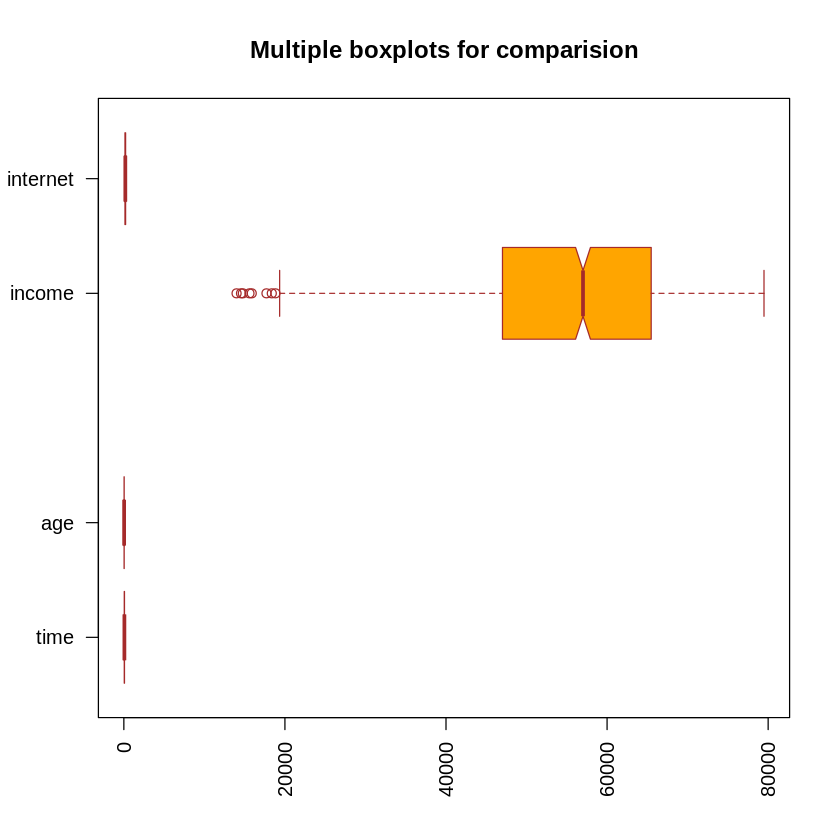

In [ ]:
#Checking for outliers in our numerical columns
boxplot(time, age, income, internet,
main = "Multiple boxplots for comparision",
at = c(1,2,4,5),
names = c("time", "age", "income", "internet"),
las = 2,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

Key take aways:


*   The Daily Time Spent on Site, the Age and the Daily Internet usage column do not have outliers. 
*   The Area income variable does have outliers. Given the vast nature of the income possibilies in an area it would be unwise to drop outliers in this column. Hence I will not drop outliers. 



I also decided to change the Male column name to Gender for 1 to represent the Males, and 0 to represent the Females.

# 5. Feature Engineering

I decided to split the Timestamp column into Year, Month and Day columns to visualize analyze the peak month and peak days.

In [9]:
#Importing the necessary library for splitting the dataset.
library(tidyr)

In [50]:
#Separating our Time stamp column into Year, Month and day.
df = separate(df, "Timestamp", c("Year", "Month", "Day"), sep = "-")

I decided to drop the Ad Topic Line column since it did not have much information to be extracted from as of now. I also decided to drop the Year column since the data collection occured in the Year 2016 alone.

In [51]:
#Dropping the Ad Topic line column and the Year column.
df = df[, c("Ad Topic Line","Year"):=NULL] 

In [12]:
#Previewing the first few rows in our data table.
head(df)

Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Gender,Country,Month,Day,Clicked_on_Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Wrightburgh,Female,Tunisia,03,27,0
80.23,31,68441.85,193.77,West Jodi,Male,Nauru,04,04,0
69.47,26,59785.94,236.50,Davidton,Female,San Marino,03,13,0
74.15,29,54806.18,245.89,West Terrifurt,Male,Italy,01,10,0
68.37,35,73889.99,225.58,South Manuel,Female,Iceland,06,03,0
59.99,23,59761.56,226.74,Jamieberg,Male,Norway,05,19,0


# 5. Data Exploration

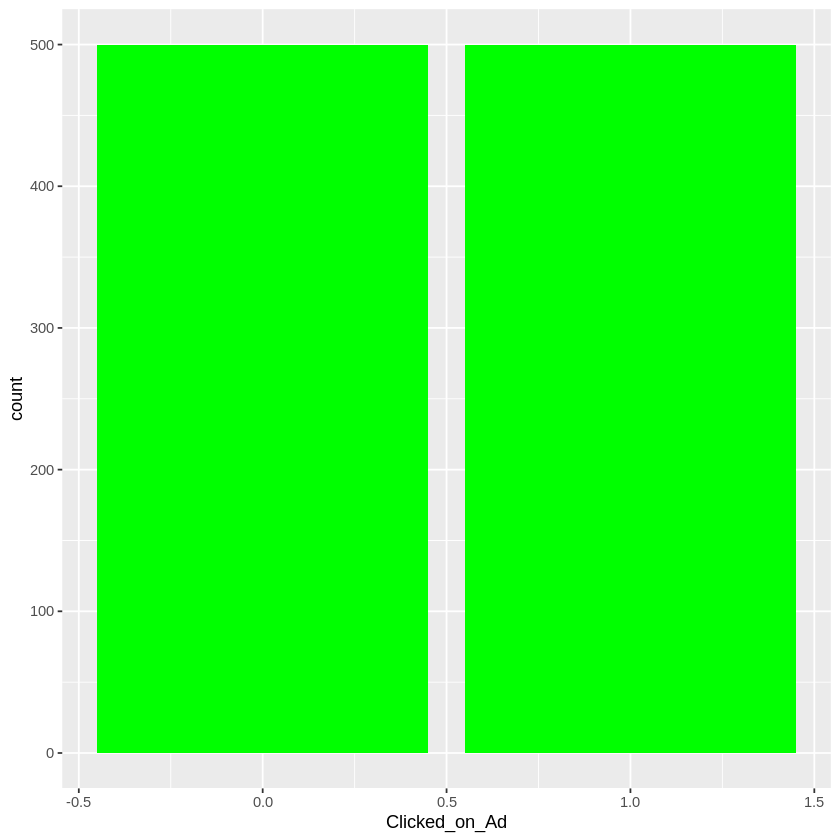

In [ ]:
#Visualzing the number of clicked ads and no clicked ads in our dataset.
ggplot(df, aes(Clicked_on_Ad)) + 
  geom_bar(fill = "green")

There was an equal umber of clicked ads and no clicked ads in our dataset.

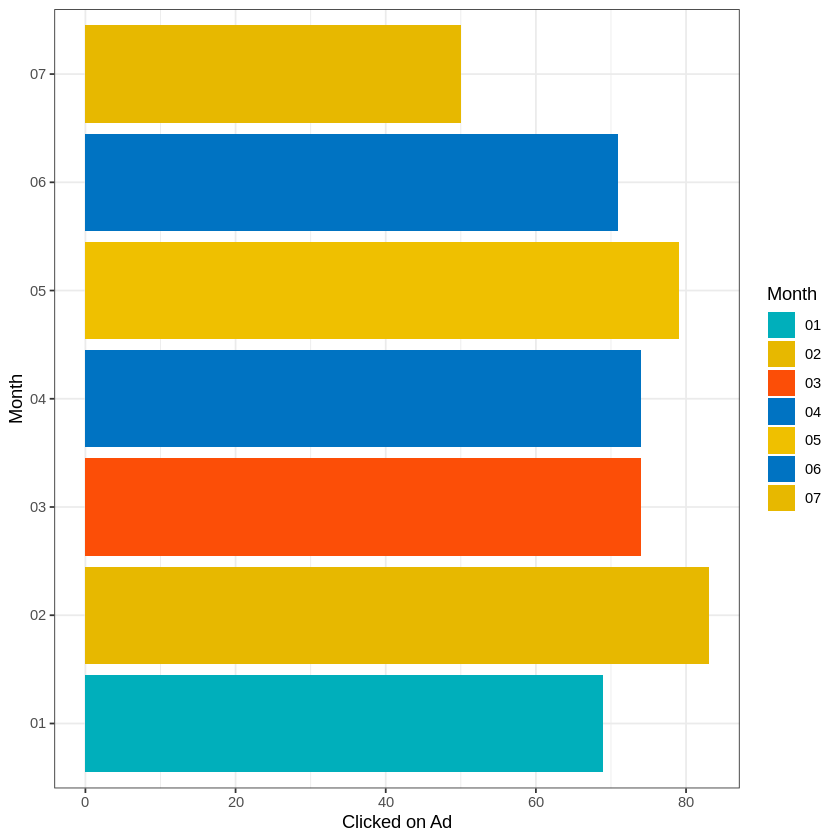

In [ ]:
#Finding out the month with the most clicked ads
a <- ggplot(df, aes(x = `Clicked on Ad`, y = `Month`))

a + geom_col(aes(fill = `Month`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07","#0073C2FF", "#EFC000FF","#0073C2FF","#E7B800"))

Key points:


*   February and May had the most clicked ads.
*   July had the least clicked ads. 
*   March and April had almost the same clicked ads.



In [ ]:
#Grouping by top ten days that had the most clicked ads
day <- df %>% 
  group_by(Day) %>%
  summarise(n=sum(Clicked_on_Ad, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



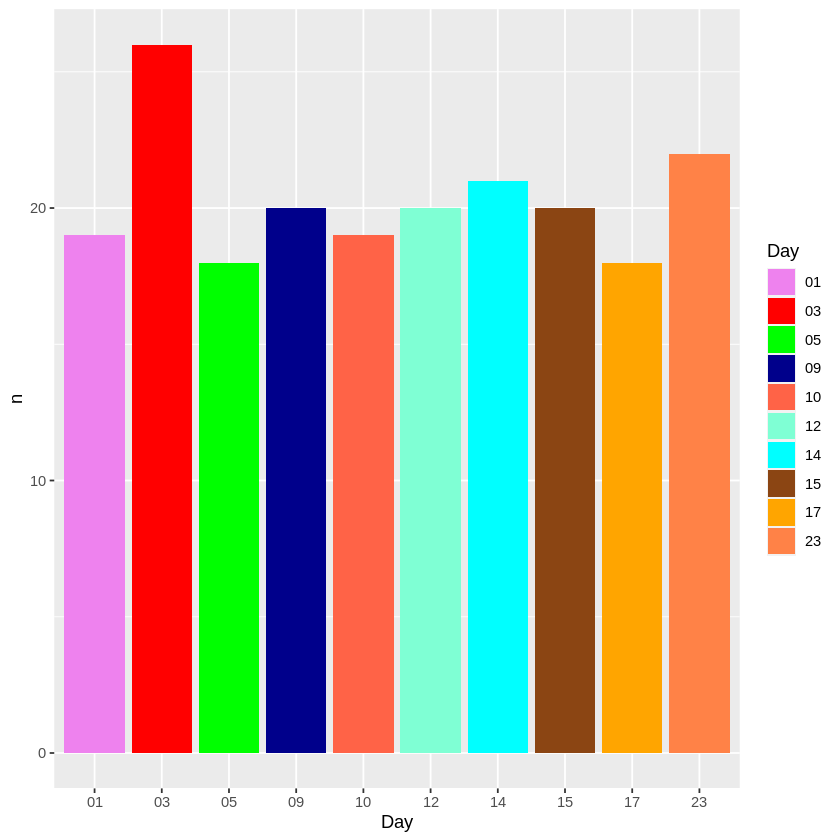

In [ ]:
#Visualizing the days with the most clicked ads.
z <- ggplot(day, aes(x = `Day`, y = n))

z + geom_col(aes(fill = `Day`)) +
  scale_fill_manual(values = c("violet", "red","green","darkblue","tomato","aquamarine","cyan","chocolate4","orange","sienna1"))

The following days experienced the most clicked ads:


*   The 3rd day of the month
*   The 23rd Day of the month
*   The 14th day of the month
*   The 9th day of the month.
*   The 12th day of the month.



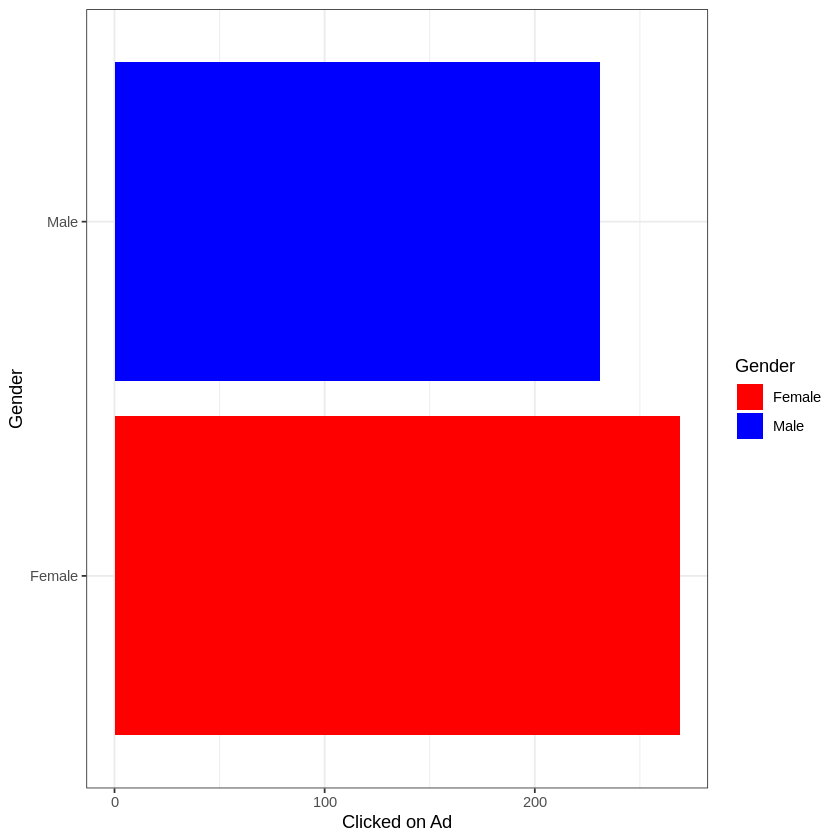

In [ ]:
#Displaying the Gender that were most likely to click the ads.
b <- ggplot(df, aes(x = `Clicked on Ad`, y = `Gender`))

b + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c('red', 'blue'))

Females were most likely to click the ads compared to Males. 

I also wanted to find out the Gender that spent the most time daily on the site.

In [ ]:
#Grouping the Gender by the Daily Time Spent on the Site
time_spent <- df %>% 
  group_by(Gender) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



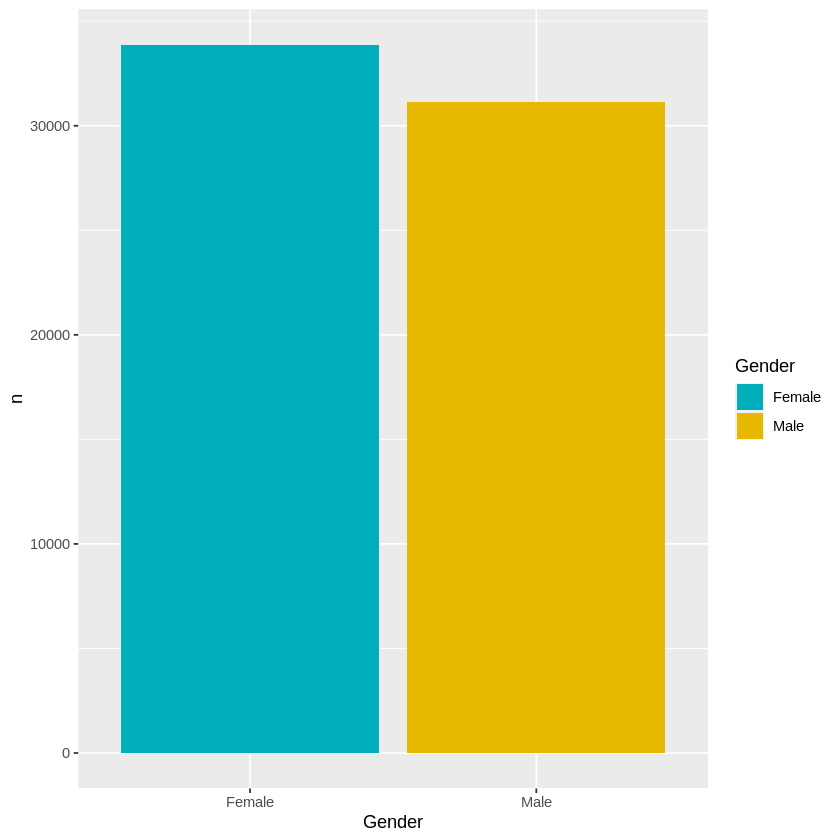

In [ ]:
#Plotting the the two groups.
e <- ggplot(time_spent, aes(x = `Gender`, y = n))

e + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800"))

Females spent more time daily on the Site more than the males.

I also wanted to find out the Daily Time Spent per Site per country.

In [ ]:
#Grouping the Country by the Daily Time spent on site.
country <- df %>% 
  group_by(Country) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



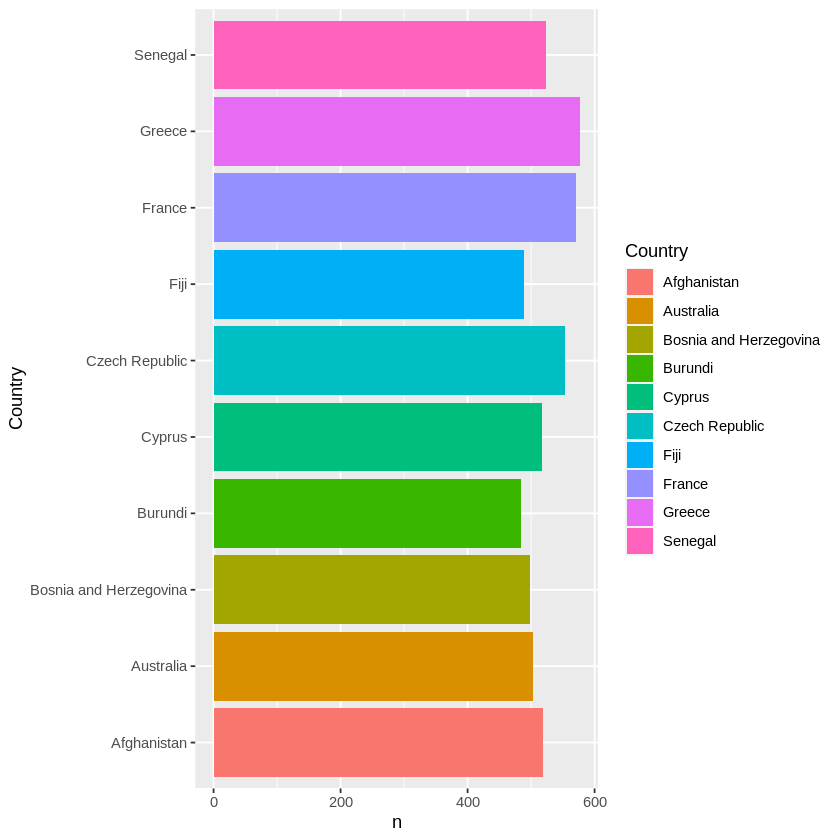

In [ ]:
#Viewing the countries with the spending the most time on the site.
f <- ggplot(country, aes(x = n, y = `Country`))

f + geom_col(aes(fill = `Country`)) 

There is more time being spent on the site in these countries:

*   Greece
*   France
*   Czech Republic
*   Senegal
*   Afghanistan





In [ ]:
#Grouping the Daily time spent on site by the cities.
city <- df %>% 
  group_by(City) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



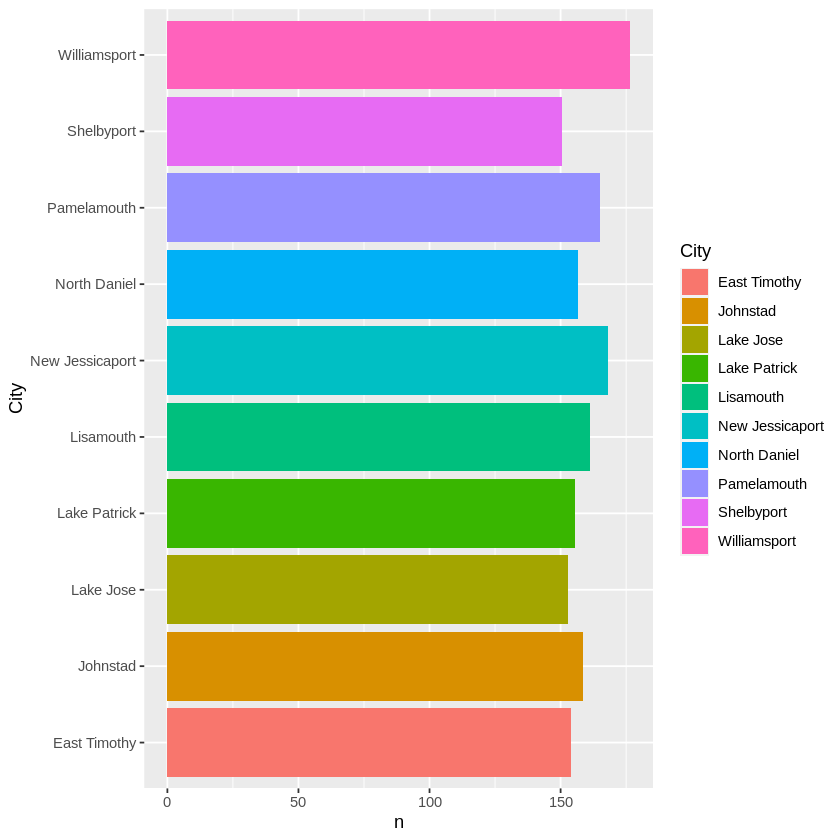

In [ ]:
#Viewing the highest daily time spent on the site in the countries.
g <- ggplot(city, aes(x = n, y = `City`))

g + geom_col(aes(fill = `City`)) 

More daily time in spent on the site in the following cities respectively:


*   Williamsport
*   New Jessicaport
*   Pamelamouth
*   Lisamouth
*   Johnstad



In [ ]:
#Grouping the average age of the individuals who clicked the ad
age <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Age, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



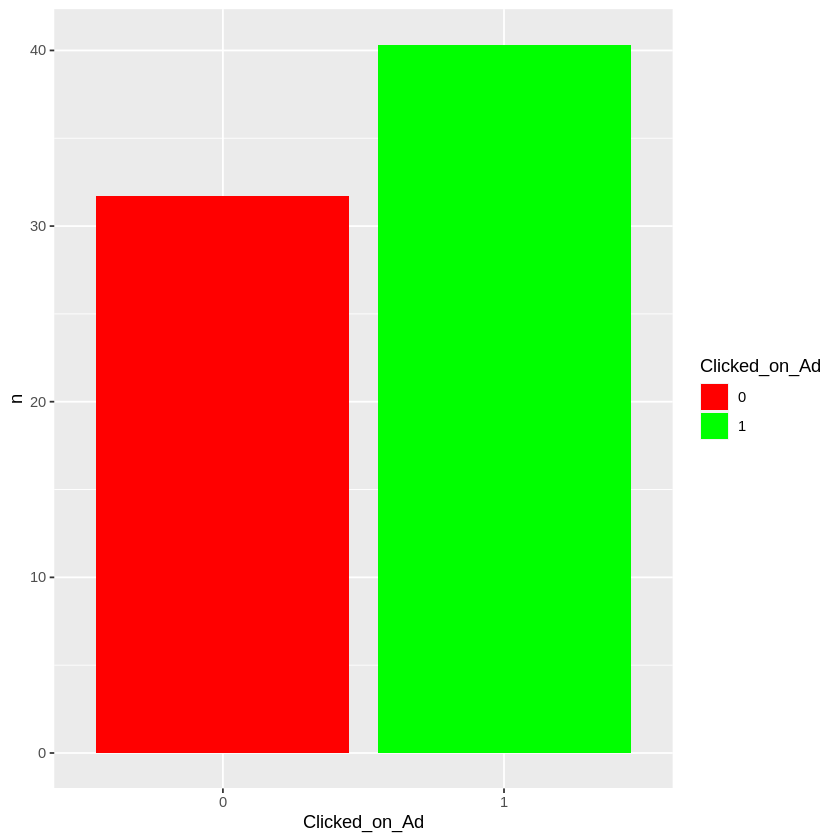

In [ ]:
#Displaying the average age of the individals who clicked the ads.
h <- ggplot(age, aes(x = `Clicked_on_Ad`, y = n))

h + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("red", "green"))

The individuals who did not clicked the ad were around 32 years of age while the ones who actually clicked the ad were aroudn 40 years of age.

In [ ]:
#Grouping Number of Clicks in a country and picing the ten highest.
country_ad <- df %>% 
  group_by(Country) %>%
  summarise(n=sum(Clicked_on_Ad, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



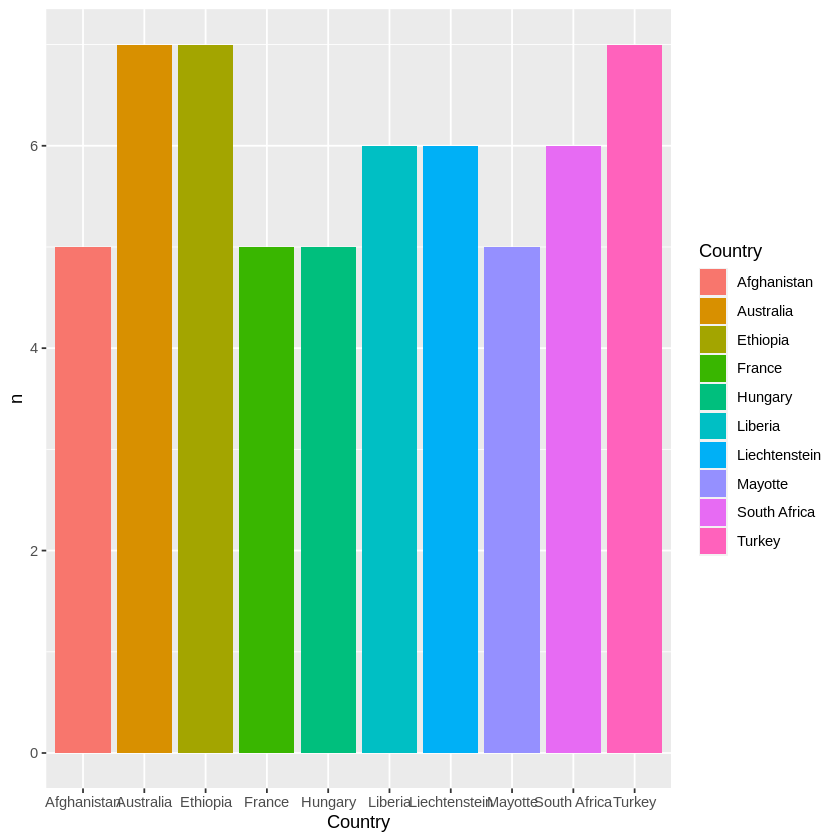

In [ ]:
#Visualizing the clicks in a country.
i <- ggplot(country_ad, aes(x = `Country`, y = n))

i + geom_col(aes(fill = `Country`)) 

The countries that had the highest click through are:


*   Autralia, Ethiopia and Turkey had the highest clicks of her ads.
*   Liechtenstein and South Africa followed as well.



In [ ]:
#Finding out the mean number of seconds an individual takes to click an ad or not
daily_time <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Time_Spent_on_Site, na.rm=TRUE)) %>%

`summarise()` ungrouping output (override with `.groups` argument)



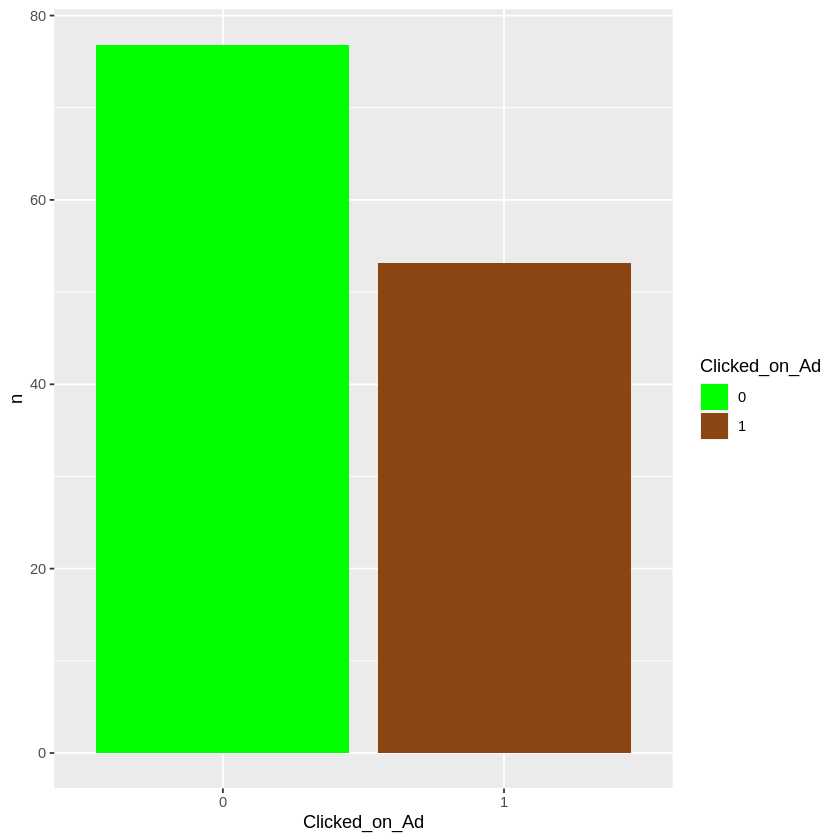

In [ ]:
#Visualizing the results.
m <- ggplot(daily_time, aes(x = `Clicked_on_Ad`, y = n))

m + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("green", "chocolate4"))

An individual takes an average of 53 seconds to click and ad and an average of 76 seconds not to click an ad.

In [ ]:
#Grouping the mean area income by the Click through rate of an individual.
area_income <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Area_Income, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



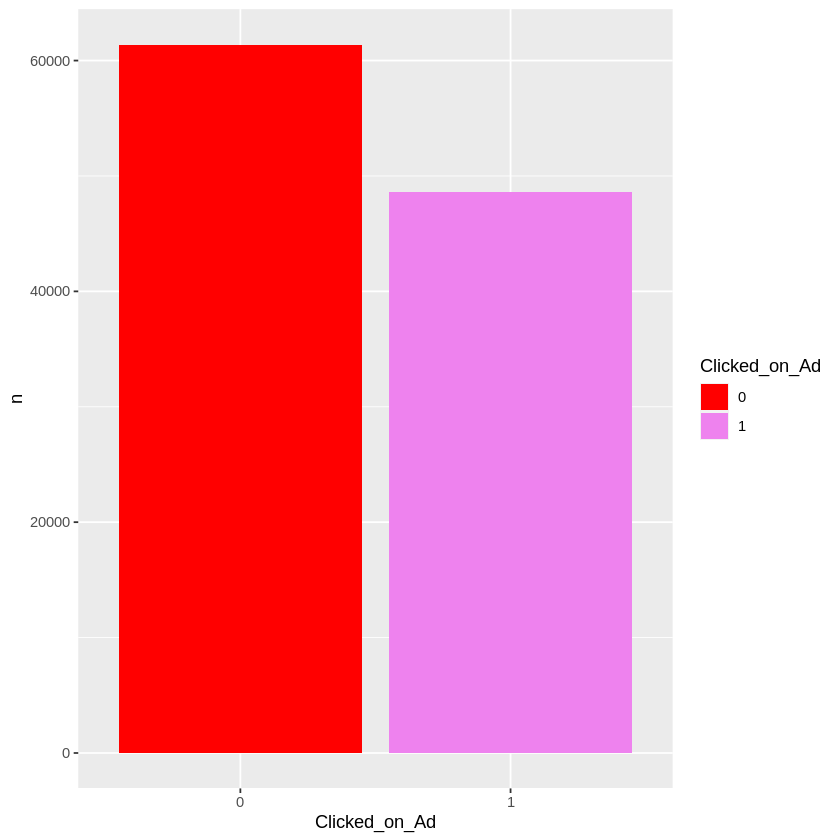

In [ ]:
#Visualzing the results.
n <- ggplot(area_income, aes(x = `Clicked_on_Ad`, y = n))

n + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("red", "violet"))

Persons with an area income of around 48000 clicked the ad. Persons who did not click the ad had an area of income of around 60000.

In [ ]:
#Grouping Daily Internet Usage according to whether one clicked an ad or not.
internet_usage <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Daily_Internet_Usage, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



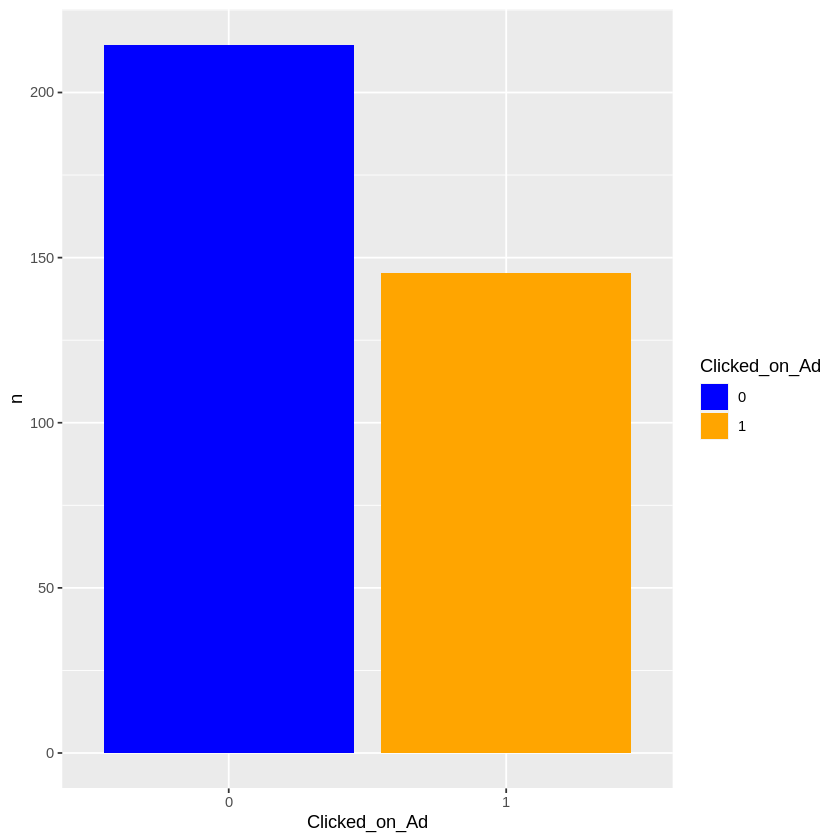

In [ ]:
#Viewing the results
o <- ggplot(internet_usage, aes(x = `Clicked_on_Ad`, y = n))

o + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("blue", "orange"))

The persons who clicked the ad had an average lower internet spending than their counterparts. The persons who clicked had an daily internet spending of 145, while the ones who did not click had an average spending of 214.

In [ ]:
#Importing the necessary library to make correlation plots
library(ggcorrplot)

In [ ]:
#Subsetting numerical columns in the datatable
numerical_cols <- (colnames(df) == 'Time_Spent_on_Site' | colnames(df) == 'Age' | colnames(df) == 'Area_Income' | colnames(df) == 'Daily_Internet_Usage' | colnames(df) == 'Clicked_on_Ad')
cols <- subset(df,,numerical_cols)

In [ ]:
#Finding correlations in our numerical columns.
cor(cols)

,Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
Time_Spent_on_Site,1.0000000,-0.3315133,0.3109544,0.5186585,-0.7481166
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086,0.4925313
Area_Income,0.3109544,-0.1826050,1.0000000,0.3374955,-0.4762546
Daily_Internet_Usage,0.5186585,-0.3672086,0.3374955,1.0000000,-0.7865392
Clicked_on_Ad,-0.7481166,0.4925313,-0.4762546,-0.7865392,1.0000000


Key takeways from the correlation matrix above:


*   The Time spent on Site has a negative impact on whether one will click an ad.
*   The Daily Internet Usage has also a strong impact on whether one will click an ad or not.
*   The Time Spent on Site and the Daily Internet Usage has a positive linear relationship.
*   The Age and whether one clicked an ad has also a positive linear relationship.



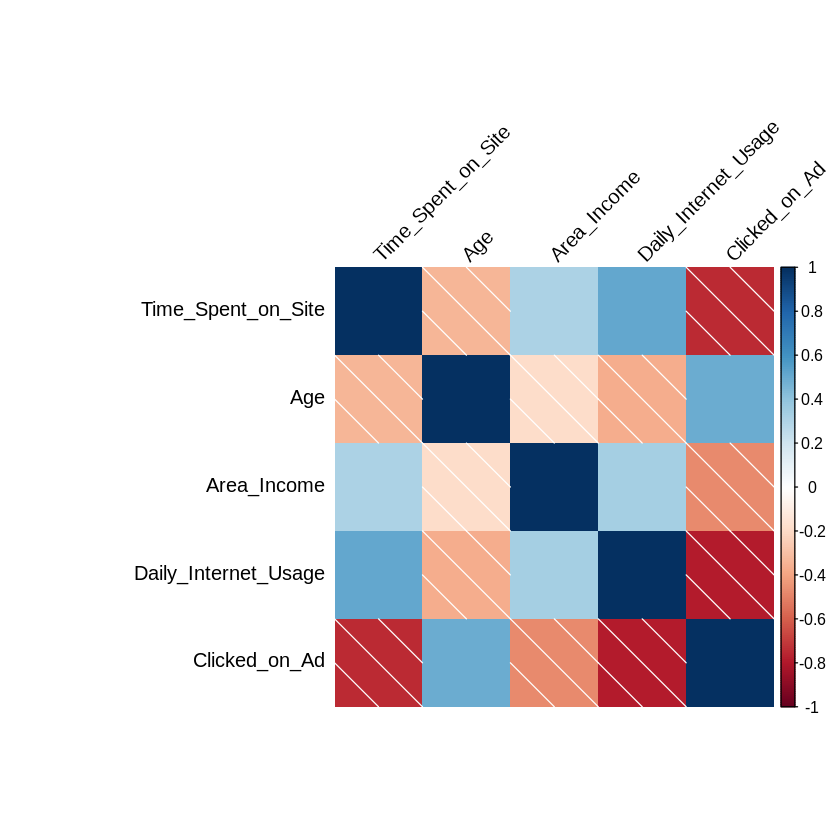

In [ ]:
#Visualizing the Correlation Matrix.
corrplot(cor(cols), method="shade", tl.col="black", tl.srt=45)

The Red areas represent the strongly negatively correlated and the Blue areas show a positive linear relationship.

In [ ]:
cols = cols[, c("Clicked_on_Ad"):=NULL] 

Installing the package to do Standard Deviation in all continuous variable columns.

# Measures of Central Tendency and Spread

In [ ]:
#Installing fBasics
install.packages("fBasics", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘gss’, ‘stabledist’, ‘akima’, ‘RUnit’




In [ ]:
#Loading fBasics on our notebook.
library('fBasics')

Loading required package: timeDate

Loading required package: timeSeries



In [ ]:
#Finding the mean in our continuous variable columns.
colMeans(cols)

Time_Spent_on_Site                  Age          Area_Income 
             65.0002              36.0090           55000.0001 
Daily_Internet_Usage 
            180.0001

The means in our columns are:

*   The mean time spent in our data is 65
*   The mean age in our data is 36.
*   The mean Area income is 55000.
*   The Daily Internet Usage is 180.



In [ ]:
#Finding the Standard Deviation in our continuous variable columns.
colStdevs(cols)

Time_Spent_on_Site                  Age          Area_Income 
           15.853615             8.785562         13414.634022 
Daily_Internet_Usage 
           43.902339

In [ ]:
#Getting the variance in our continuous variable columns
colVars(cols)

Time_Spent_on_Site                  Age          Area_Income 
        2.513371e+02         7.718611e+01         1.799524e+08 
Daily_Internet_Usage 
        1.927415e+03

In [ ]:
#Getting the skewness in our continuous variable columns.
skewness(cols)

Time_Spent_on_Site                  Age          Area_Income 
         -0.37064595           0.47770522          -0.64842285 
Daily_Internet_Usage 
         -0.03343681

Key Takeways:


*   The Age is approximately symmetric.
*   The Area Income is moderately skewed.



In [ ]:
#Getting the kurtosis of our continuous variables.
kurtosis(cols)

Time_Spent_on_Site                  Age          Area_Income 
          -1.0998638           -0.4097066           -0.1110924 
Daily_Internet_Usage 
          -1.2757525

Key take aways:


*   The Daily Time Spent on Site distribution shape is almost flat
*   The Daily Internet Usage distribution is also as well almost flat.



In [ ]:
#Getting the quartile ranges 
lapply(cols,quantile,probs=c(0.25,0.75))

$Time_Spent_on_Site
    25%     75% 
51.3600 78.5475 

$Age
25% 75% 
 29  42 

$Area_Income
     25%      75% 
47031.80 65470.64 

$Daily_Internet_Usage
     25%      75% 
138.8300 218.7925

In [ ]:
#Picking categorical columns in our dataset to analyze
cat_cols <- !(colnames(df) == 'Time_Spent_on_Site' | colnames(df) == 'Age' | colnames(df) == 'Area_Income' | colnames(df) == 'Daily_Internet_Usage')
cats <- subset(df,,cat_cols)

In [ ]:
#Creating a mode function
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

In [ ]:
#Getting the City that had the most individuals.
library(dplyr)

df %>% 
  group_by(City) %>% 
  summarise(city = calculate_mode(City))

city
<chr>
Lisamouth


Lisamouth was the City with the most individuals.

In [ ]:
#Getting the Gender that was mentioned most.
df %>% 
  group_by(Gender) %>% 
  summarise(gender = calculate_mode(Gender))

gender
<chr>
Female


Our data table had most Females.

In [ ]:
#Getting the Country with most persons.
df %>% 
  group_by(Country) %>% 
  summarise(country = calculate_mode(Country))

country
<chr>
Czech Republic


Czech Republic is the mode with in the Country column.

In [ ]:
#Getting the month with the most persons.
df %>% 
  group_by(Month) %>% 
  summarise(month = calculate_mode(Month))

month
<chr>
02


February is the month with the mode in our dataset.

In [ ]:
#Getting the mode in the Day Column.
df %>% 
  group_by(Day) %>% 
  summarise(day = calculate_mode(Day))

day
<chr>
03


The 3rd day is the mode in our dataset.

# Conclusion

The entrepreneur should check these in her marketing strategy when starting the cryptography course:


*   The average daily time spent of a person who clicked the ad is less than the one who did not. Therefore she should focus on individuals who are light browsers. The average time a person time on the site is 53 seconds to click on the ad.
*   The more a person aged the more likely the person was likely to be interested in cryptography. The mean age of a person who clciked the ad was 40 years of age.
*  Females were more likely to click the cryptography ad. Probably the ad lines were more female oriented therefore attracting more women. More analysis can be carried out in this particular area.
*  The individuals from this countries were more likely to click the ad: 

     *   Autralia
     *   Ethiopia 
     *   Turkey
     *   South Africa
     *   Liechtenstein.

     More data on more cities can be provided upon request.
*  The individuals from these cities were more likely to click the ad:

    *  Williamsport
    *   New Jessicaport
    *   Pamelamouth
    *   Lisamouth
    *   Johnstad

    More city names can be provided upon request.

*   Individuals from a generally middle income areas clicked the ads more than the ones from a higher income area. The ones who clicked the ad were from an average area income of 48000 and the ones who did not click were from an average area income of 60000.
*   The pattern of income areas was also displayed in the daily internet usage. A lower daily internet usage clicked the ads more than the ones who had a higher internet usage.    
    
    




# Challenging the Solution

*  More analysis can be done on the head line. To extract important information on which topic excites which country. 
*  The hour data was also dropped which could be used to analyze which was the peak hour for the clicking of the ads.
*  I could also do a hypothesis test to test for the significant difference between the daily time spent on sites. There could be no significant difference between the daily time spent on sites in different countries. 
*  It was observed that there was a very strong relation between time spent on sites and the clicking of an ad.


# Random Forest Classifcation

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [13]:
#Installing the package needed for the classification which are the rpart, rpart.plot,mlbench
install.packages("rpart",dependencies = TRUE)
install.packages("rpart.plot",dependencies=TRUE)
install.packages("mlbench",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘plotmo’, ‘TeachingDemos’, ‘earth’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
#Loading the libraries in our notebook.
library("rpart")
library("rpart.plot")
library("mlbench")

I decided to reduce cardinality by segmenting the countries in their respective continents.

In [16]:
#Importing the countrycode package
install.packages("countrycode",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
#Loading the package in my notebook
library("countrycode")

In [53]:
#Adding a continent column and segmeting in the respective continents.
df$continent <- countrycode(sourcevar = df[, Country],
                            origin = "country.name",
                            destination = "continent")

Warning message in countrycode(sourcevar = df[, Country], origin = "country.name", :
“Some values were not matched unambiguously: Antarctica (the territory South of 60 deg S), Bouvet Island (Bouvetoya), British Indian Ocean Territory (Chagos Archipelago), French Southern Territories, Heard Island and McDonald Islands, Micronesia, Saint Martin, South Georgia and the South Sandwich Islands, United States Minor Outlying Islands
”


In [55]:
#Dropping the City column and the Country column.
df = df[, c("City","Country"):=NULL] 

In [56]:
#Factorizing the continet and Gender column
df$continent <- as.integer(as.factor(df$continent))
df$Gender <- as.integer(as.factor(df$Gender))

In [57]:
#Previewing the changes in the dataset
head(df)

Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Month,Day,Clicked_on_Ad,continent
<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
68.95,35,61833.90,256.09,1,03,27,0,1
80.23,31,68441.85,193.77,2,04,04,0,5
69.47,26,59785.94,236.50,1,03,13,0,4
74.15,29,54806.18,245.89,2,01,10,0,4
68.37,35,73889.99,225.58,1,06,03,0,4
59.99,23,59761.56,226.74,2,05,19,0,4


In [58]:
#Maintaing a copy of the dataset
copy <- copy(df)

In [27]:
#Installing the random Forest model
install.packages("randomForest",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
#Loading the random forest in my notebook
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [37]:
# Split into Train and Validation sets
# Training Set : Validation Set = 70 : 30 (random)
set.seed(100)
train <- sample(nrow(df), 0.7*nrow(df), replace = FALSE)
TrainSet <- df[train,]
ValidSet <- df[-train,]
summary(TrainSet)
summary(ValidSet)

 Time_Spent_on_Site      Age        Area_Income    Daily_Internet_Usage
 Min.   :32.60      Min.   :19.0   Min.   :13996   Min.   :104.8       
 1st Qu.:52.04      1st Qu.:29.0   1st Qu.:46856   1st Qu.:137.4       
 Median :68.82      Median :35.0   Median :56782   Median :178.8       
 Mean   :65.32      Mean   :36.2   Mean   :54879   Mean   :178.8       
 3rd Qu.:78.84      3rd Qu.:42.0   3rd Qu.:64928   3rd Qu.:218.9       
 Max.   :91.37      Max.   :61.0   Max.   :79332   Max.   :261.5       
     Gender         Month               Day            Clicked_on_Ad     
 Min.   :1.000   Length:675         Length:675         Length:675        
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :1.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.468                                                           
 3rd Qu.:2.000                                                           
 Max.   :2.000                                      

 Time_Spent_on_Site      Age         Area_Income    Daily_Internet_Usage
 Min.   :32.60      Min.   :19.00   Min.   :14548   Min.   :105.0       
 1st Qu.:51.60      1st Qu.:29.00   1st Qu.:47192   1st Qu.:142.4       
 Median :67.36      Median :34.00   Median :57557   Median :190.6       
 Mean   :64.73      Mean   :35.65   Mean   :55191   Mean   :182.2       
 3rd Qu.:77.16      3rd Qu.:41.75   3rd Qu.:65871   3rd Qu.:218.7       
 Max.   :91.43      Max.   :60.00   Max.   :79485   Max.   :270.0       
     Gender         Month               Day            Clicked_on_Ad     
 Min.   :1.000   Length:290         Length:290         Length:290        
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :1.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.497                                                           
 3rd Qu.:2.000                                                           
 Max.   :2.000                               

In [60]:
#Factorizing the class label to a TRue or False
df$Clicked_on_Ad <- factor(df$Clicked_on_Ad, levels = c(0,1), labels = c("False", "True"))

In [67]:
# Create a Random Forest model with default parameters
model1 <- randomForest(y = df$Clicked_on_Ad, x = df[,c("Time_Spent_on_Site","Age","Area_Income","Daily_Internet_Usage","Gender","Month","Day","continent")], keep.forest=FALSE, importance = TRUE,type="Class")
model1


Call:
 randomForest(x = df[, c("Time_Spent_on_Site", "Age", "Area_Income",      "Daily_Internet_Usage", "Gender", "Month", "Day", "continent")],      y = df$Clicked_on_Ad, importance = TRUE, keep.forest = FALSE,      type = "Class") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.63%
Confusion matrix:
      False True class.error
False   468   14  0.02904564
True     21  462  0.04347826

The model had a standard error rate 0f 3.63% 
14 rows were misplaced a True while they were False and 21 rows were misplaced a False while True.

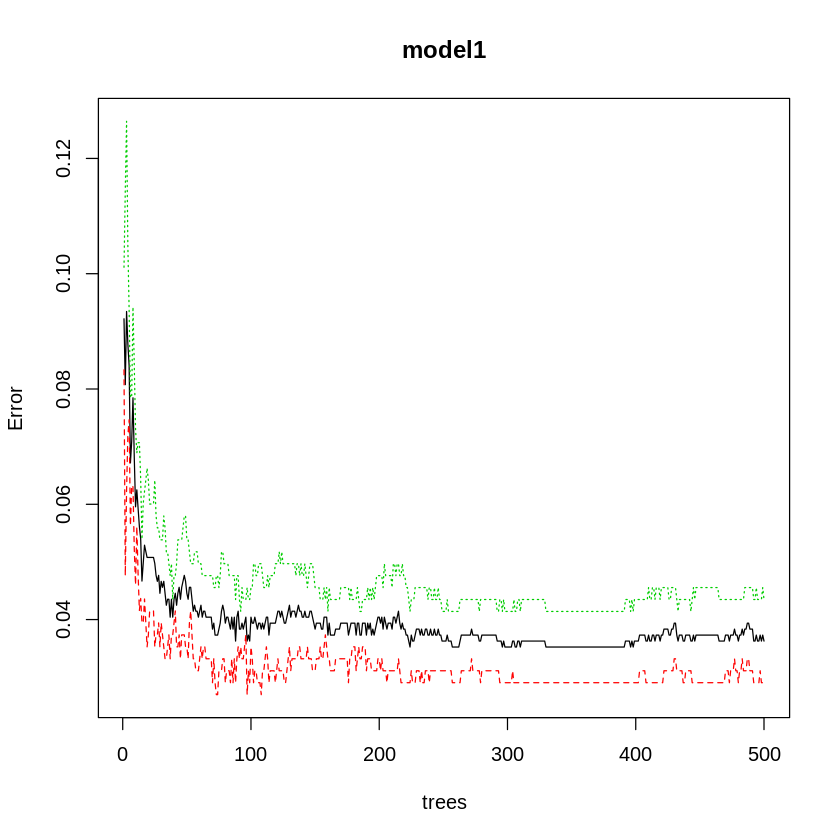

In [68]:
#Viewing the error rate in the model.
plot(model1)

Fewer number of trees had a high error rate compared to the 500 tree used in our model.

# Hyper-parameter Tuning of the Random Forest

In [75]:
#Installing the caret package for tuning our model
install.packages("caret",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘superpc’ is not available”
also installing the dependencies ‘bitops’, ‘numDeriv’, ‘SQUAREM’, ‘R.cache’, ‘gdata’, ‘caTools’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lava’, ‘miniUI’, ‘styler’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘ISwR’, ‘corpcor’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘MLmetrics’, ‘party’, ‘pls’, ‘proxy’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘Cubist’




In [76]:
#Loading the library in our notebook
library("caret")

Loading required package: lattice



In [78]:
#Installing ranger and loading in our notebook.
install.packages("ranger",dependencies = TRUE)
library("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [79]:
#Training our model
model <- train(Clicked_on_Ad ~ .,
               data = df,
               method = "ranger",
               tuneLength = 5)

In [81]:
#Hyperparameter tuning of our model. Uing both the gini and extratrees as splitrules
set.seed(42)
myGrid <- expand.grid(mtry = c(5, 10, 20, 40, 60),
                     splitrule = c("gini", "extratrees"),
                     min.node.size = 10)
model <- train(Clicked_on_Ad ~ .,
               data = df,
               method = "ranger", 
               tuneGrid = myGrid,
               trControl = trainControl(method = "cv",
                                       number = 5,
                                       verboseIter = FALSE))

Warning message:
“model fit failed for Fold1: mtry=60, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=60, splitrule=extratrees, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold2: mtry=60, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold2: mtry=60, splitrule=extratrees, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold3: mtry=60, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt

In [82]:
#Checking the performance of the tuning
model

Random Forest 

965 samples
  8 predictor
  2 classes: 'False', 'True' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 772, 772, 772, 773, 771 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   5    gini        0.9637195  0.9274396
   5    extratrees  0.9616522  0.9233126
  10    gini        0.9657974  0.9315985
  10    extratrees  0.9616308  0.9232694
  20    gini        0.9647450  0.9294942
  20    extratrees  0.9637087  0.9274237
  40    gini        0.9585166  0.9170396
  40    extratrees  0.9647504  0.9295048
  60    gini              NaN        NaN
  60    extratrees        NaN        NaN

Tuning parameter 'min.node.size' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 10, splitrule = gini
 and min.node.size = 10.

With an mtry of 10 and splitrule of gini our model achived the highest accuracy of close to 97%.

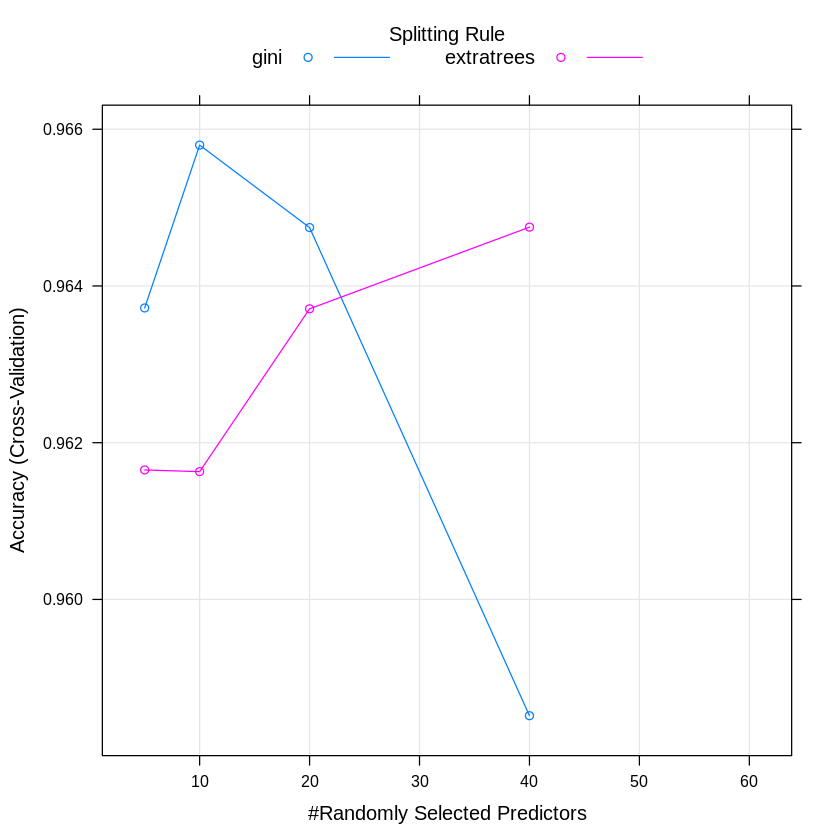

In [83]:
#Plotting the tuning of our model
plot(model)

Evidently the gini splitrule and the 10 random selected predictor worked well for our model.

In [71]:
# Using the rpart library to viualize the true
model2 <- rpart(Clicked_on_Ad ~ ., data = df, cp=0.2)
model2

n= 965 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 965 482 True (0.4994819 0.5005181)  
  2) Daily_Internet_Usage>=177.505 504  59 False (0.8829365 0.1170635) *
  3) Daily_Internet_Usage< 177.505 461  37 True (0.0802603 0.9197397) *

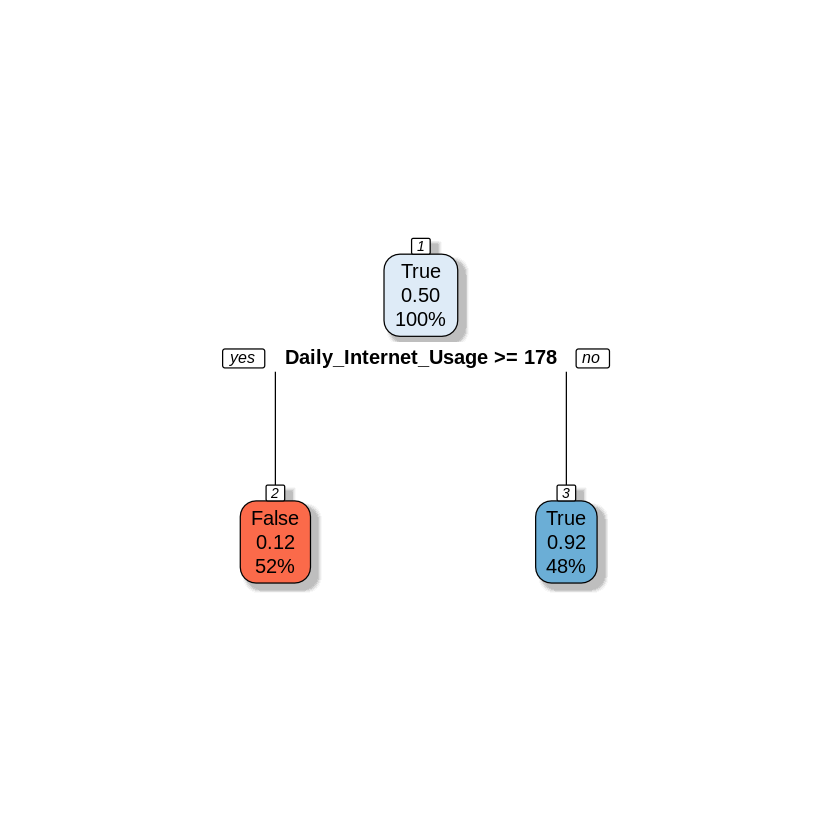

In [73]:
# Visualize the decision tree with rpart.plot
rpart.plot(model2, box.palette="RdBu", shadow.col="gray", nn=TRUE)

The daily internet usage was used to split the tree and had the highest information gain. With a 178 seconds decision criteria the model was able to place whether one clicked an ad. The daily internet usage was therefore an important variable.

#  Appropriateness of the data to the problem.

The data well explained the relation with an individual clicking an ad. 
It would be best if the data collector could segement the site news into sectors for easier univariate and bivariate analysis. 